### 移动MNIST图像并加入到训练集中。

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [2]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
shuffle_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_idx], y_train[shuffle_idx]

In [5]:
from scipy.ndimage.interpolation import shift

In [6]:
def shift_image(image, dx, dy):
    '''将MNIST图像向任意方向（上、下、左、右）移动任意像素。
    dx：表示0轴，即上（负值）下（正值）移动。
    dy：表示1轴，即左（负值）右（正值）移动'''
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dx, dy], mode='constant', cval=0)
    return shifted_image.reshape((-1))

In [7]:
# to plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
%matplotlib inline

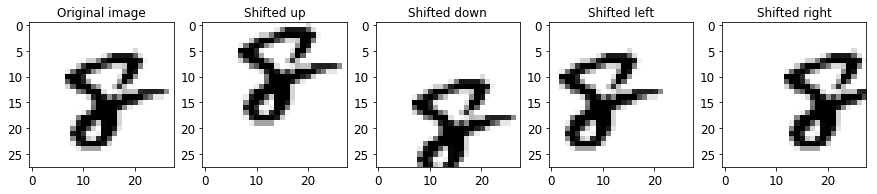

In [8]:
image = X_train[1000]
shifted_image_up = shift_image(image, -5, 0)
shifted_image_down = shift_image(image, 5, 0)
shifted_image_left = shift_image(image, 0, -5)
shifted_image_right = shift_image(image, 0, 5)

plt.figure(figsize=(15, 4))
plt.subplot(151)
plt.title('Original image')
plt.imshow(image.reshape((28, 28)), interpolation="nearest", cmap="Greys")

plt.subplot(152)
plt.title('Shifted up')
plt.imshow(shifted_image_up.reshape(28, 28),
           interpolation="nearest", cmap="Greys")

plt.subplot(153)
plt.title('Shifted down')
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")

plt.subplot(154)
plt.title('Shifted left')
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")

plt.subplot(155)
plt.title('Shifted right')
plt.imshow(shifted_image_right.reshape(28, 28),
           interpolation="nearest", cmap="Greys")

plt.show()

对训练集中的每张图片，创建四个位移后的副本（每个方向一个），添加到训练集中。

In [9]:
X_train_argmented = [image for image in X_train]
y_train_argmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, -1), (0, 1)):
    for (image, label) in zip(X_train, y_train):
        X_train_argmented.append(shift_image(image, dx, dy))
        y_train_argmented.append(label)

In [29]:
X_train_argmented = np.array(X_train_argmented)
y_train_argmented = np.array(y_train_argmented)

In [41]:
len(X_train_argmented)

300000

In [42]:
shuffle_idx = np.random.permutation(len(X_train_argmented))
X_train_argmented = X_train_argmented[shuffle_idx]
y_train_argmented = y_train_argmented[shuffle_idx]